In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
pwd

'/Users/illesgabor/Documents/Mastering_Process_DS'

### 1.	Read and prepare Drinks.csv

In [112]:
drinks = pd.read_csv("Drinks.csv")

In [113]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,NaN
1,Albania,89,132,54,NaN
2,Algeria,25,0,14,NaN
3,Andorra,245,138,312,NaN
4,Angola,217,57,45,NaN
5,Antigua & Barbuda,102,128,45,NaN
6,Argentina,193,25,221,NaN
7,Armenia,21,179,11,NaN
8,Australia,261,72,212,NaN
9,Austria,279,75,191,NaN


In [114]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
country                         193 non-null object
beer_servings                   193 non-null object
spirit_servings                 193 non-null object
wine_servings                   193 non-null object
total_litres_of_pure_alcohol    0 non-null float64
dtypes: float64(1), object(4)
memory usage: 7.6+ KB


In [115]:
drinks['beer_servings'] = pd.to_numeric(drinks['beer_servings'], errors= "coerce")
drinks['spirit_servings'] = pd.to_numeric(drinks['spirit_servings'], errors= "coerce")
drinks['wine_servings'] = pd.to_numeric(drinks['wine_servings'], errors= "coerce")

drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
country                         193 non-null object
beer_servings                   192 non-null float64
spirit_servings                 192 non-null float64
wine_servings                   192 non-null float64
total_litres_of_pure_alcohol    0 non-null float64
dtypes: float64(4), object(1)
memory usage: 7.6+ KB


### 2.	Calculate total liters of pure alcohol using the following information:
o	1 ounce = 0.0295 l

o	Beer serving: 12 ounces, 5% alcohol

o	Wine serving: 5 ounces, 12% alcohol

o	Spirit serving: 1.5 ounces 40% alcohol


In [116]:
ounce = 0.0295
beer_0 = 12
beer_a = 0.05
wine_o = 5
wine_a = 0.12
spirit_o = 1.5
spirit_a = 0.4
beer = ounce*beer_0*beer_a
wine = ounce*wine_o*wine_a
spirit = ounce*spirit_o*spirit_a

In [117]:
drinks["total_litres_of_pure_alcohol"]= drinks['beer_servings']*beer + \
    drinks['wine_servings']*wine + drinks['spirit_servings']*spirit

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0.0,0.0,0.0,0.0000
1,Albania,89.0,132.0,54.0,4.8675
2,Algeria,25.0,0.0,14.0,0.6903
3,Andorra,245.0,138.0,312.0,12.3015
4,Angola,217.0,57.0,45.0,5.6463


In [118]:
drinks.shape

(193, 5)

### 3.	Read, understand and prepare LifeExpectancy.csv

In [119]:
life_exp = pd.read_csv("LifeExpectancy.csv")
life_exp.head()

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61,61.25205
1,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,FMLE,Female,62,61.97733
2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,MLE,Male,61,60.51228
3,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,60,60.00000
4,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,FMLE,Female,61,61.00000


In [120]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 16 columns):
GhoCode                          6408 non-null object
GhoDisplay                       6408 non-null object
PublishStateCode                 6408 non-null object
PublishStateDisplay              6408 non-null object
YearCode                         6408 non-null int64
YearDisplay                      6408 non-null int64
RegionCode                       6408 non-null object
RegionDisplay                    6408 non-null object
WorldBankIncomeGroupGroupCode    5244 non-null object
WorldBankIncomeGroupDisplay      5244 non-null object
CountryCode                      6408 non-null object
CountryDisplay                   6408 non-null object
SexCode                          6408 non-null object
SexDisplay                       6408 non-null object
DisplayValue                     6408 non-null int64
Numeric                          6408 non-null float64
dtypes: float64(1), int64(3), o

In [121]:
life_exp_num = life_exp[["CountryDisplay", "Numeric"]]

In [122]:
life_exp_num.head()

,CountryDisplay,Numeric
0,Afghanistan,61.25205
1,Afghanistan,61.97733
2,Afghanistan,60.51228
3,Afghanistan,60.00000
4,Afghanistan,61.00000


In [123]:
life_exp_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 2 columns):
CountryDisplay    6408 non-null object
Numeric           6408 non-null float64
dtypes: float64(1), object(1)
memory usage: 100.2+ KB


In [124]:
life_exp_num_bycountry = life_exp_num.groupby("CountryDisplay").mean()
life_exp_num_bycountry.head()

,Numeric
CountryDisplay,
Afghanistan,39.058115
Albania,49.981889
Algeria,48.752299
Andorra,57.340645
Angola,34.406301


In [125]:
life_exp_num_bycountry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 1 columns):
Numeric    194 non-null float64
dtypes: float64(1)
memory usage: 3.0+ KB


In [126]:
life_exp_num_bycountry.reset_index(level=0, inplace=True)


In [127]:
life_exp_num_bycountry.head()

,CountryDisplay,Numeric
0,Afghanistan,39.058115
1,Albania,49.981889
2,Algeria,48.752299
3,Andorra,57.340645
4,Angola,34.406301


In [128]:
life_exp_num_bycountry.columns = ["country", "years"]

In [129]:
life_exp_num_bycountry.head()

,country,years
0,Afghanistan,39.058115
1,Albania,49.981889
2,Algeria,48.752299
3,Andorra,57.340645
4,Angola,34.406301


### 4.	Merge drinks and lifetime data by country

In [130]:
drink_life = pd.merge (drinks, life_exp_num_bycountry, on = "country")

In [131]:
drink_life.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,years
0,Afghanistan,0.0,0.0,0.0,0.0000,39.058115
1,Albania,89.0,132.0,54.0,4.8675,49.981889
2,Algeria,25.0,0.0,14.0,0.6903,48.752299
3,Andorra,245.0,138.0,312.0,12.3015,57.340645
4,Angola,217.0,57.0,45.0,5.6463,34.406301


In [132]:
len(drink_life)

167

In [133]:
# 193ból 167 lett

### 5.	Calculate correlation between expected lifetime and total liters of pure alcohol

In [134]:
drink_life.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,years
count,167.000000,166.000000,166.000000,165.000000,167.000000
mean,106.856287,81.265060,51.704819,4.196295,48.235222
std,103.437676,88.360431,83.412249,3.781397,6.618949
min,0.000000,0.000000,0.000000,0.000000,29.734234
25%,19.000000,4.250000,1.000000,0.796500,43.022608
50%,71.000000,60.500000,8.000000,2.761200,50.258646
75%,192.500000,123.500000,61.250000,6.991500,53.050910
max,376.000000,438.000000,370.000000,12.301500,59.119296


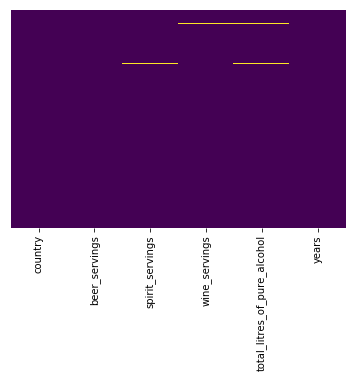

In [135]:
sns.heatmap(drink_life.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [136]:
drink_life.dropna(axis=0, inplace=True)

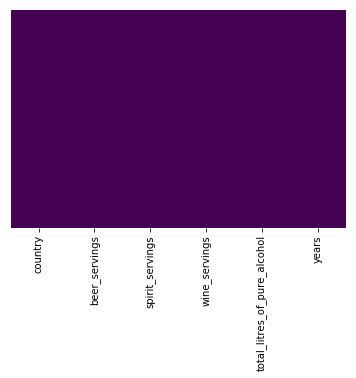

In [137]:
sns.heatmap(drink_life.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [138]:
len(drink_life)

165

In [139]:
# még 2 kiesett

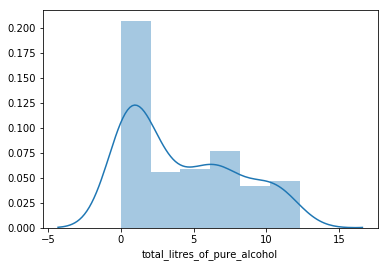

In [140]:
sns.distplot(drink_life["total_litres_of_pure_alcohol"])

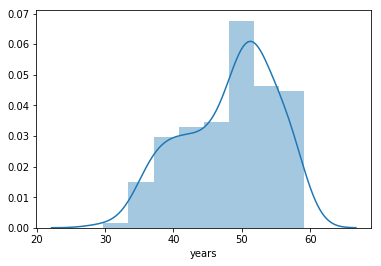

In [141]:
sns.distplot(drink_life["years"])

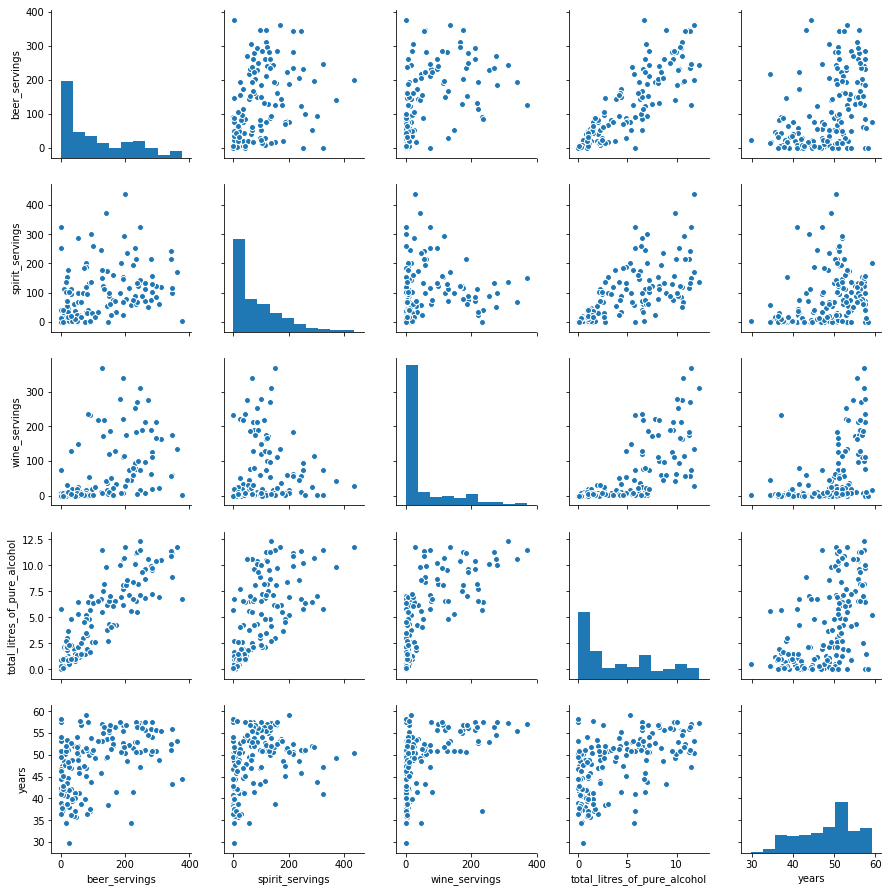

In [142]:
sns.pairplot(drink_life)

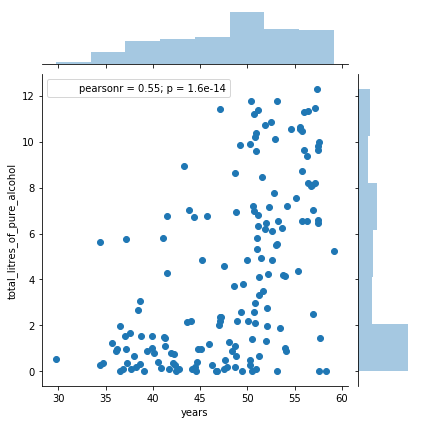

In [143]:
sns.jointplot(x="years", y= "total_litres_of_pure_alcohol", data = drink_life)

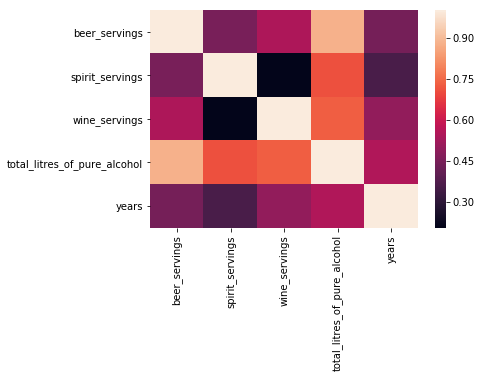

In [144]:
sns.heatmap(drink_life.corr())

In [145]:
alc_year = drink_life[["country", "total_litres_of_pure_alcohol", "years"]]
alc_year.head()

,country,total_litres_of_pure_alcohol,years
0,Afghanistan,0.0000,39.058115
1,Albania,4.8675,49.981889
2,Algeria,0.6903,48.752299
3,Andorra,12.3015,57.340645
4,Angola,5.6463,34.406301


In [146]:
alc_year.corr()

,total_litres_of_pure_alcohol,years
total_litres_of_pure_alcohol,1.000000,0.551851
years,0.551851,1.000000


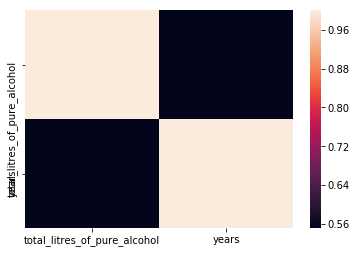

In [147]:
sns.heatmap(alc_year.corr())

### 6.	Read and prepare CountriesOfTheWorld.xlsx

In [148]:
countries = pd.read_excel("CountriesOfTheWorld.xls")
countries.head()

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,47.96,0.00,23.06,163.07,700.0,36.0,3.22,12.13,0.22,87.65,46.60,20.34
1,Albania,EASTERN EUROPE,3581655,28748,124.59,1.26,-4.93,21.52,4500.0,86.5,71.20,21.09,4.42,74.49,15.11,5.22
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.83,0.04,-0.39,31.00,6000.0,70.0,78.10,3.22,0.25,96.53,17.14,4.61
3,American Samoa,OCEANIA,57794,199,290.42,58.29,-20.71,9.27,8000.0,97.0,259.54,10.00,15.00,75.00,22.46,3.27
4,Andorra,WESTERN EUROPE,71201,468,152.14,0.00,6.60,4.05,19000.0,100.0,497.18,2.22,0.00,97.78,8.71,6.25


In [149]:
type(countries)

pandas.core.frame.DataFrame

In [150]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 16 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop. Density        227 non-null float64
Coastline           227 non-null float64
Net migration       224 non-null float64
Infant mortality    224 non-null float64
GDP                 226 non-null float64
Literacy            209 non-null float64
Phones              223 non-null float64
Arable              225 non-null float64
Crops               225 non-null float64
Other               225 non-null float64
Birthrate           224 non-null float64
Deathrate           223 non-null float64
dtypes: float64(12), int64(2), object(2)
memory usage: 28.5+ KB


In [151]:
countries.describe()

,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,224.000000,223.000000
mean,2.874028e+07,5.982270e+05,379.042511,21.165330,0.038125,35.506964,9689.823009,82.838278,236.057668,13.797111,4.564222,81.638311,22.114732,9.241345
std,1.178913e+08,1.790282e+06,1660.187541,72.286863,4.889269,35.389899,10049.138513,19.722173,227.992091,13.040402,8.361470,16.140835,11.176716,4.990026
min,7.026000e+03,2.000000e+00,0.030000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.170000,0.000000,0.000000,33.330000,7.290000,2.290000
25%,4.376240e+05,4.647500e+03,29.155000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.810000,3.220000,0.190000,71.650000,12.672500,5.910000
50%,4.786994e+06,8.660000e+04,78.770000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.150000,10.420000,1.030000,85.700000,18.790000,7.840000
75%,1.749777e+07,4.418110e+05,190.110000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.630000,20.000000,4.440000,95.440000,29.820000,10.605000
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.550000,62.110000,50.680000,100.000000,50.730000,29.740000


In [152]:
countries.drop("Region", axis=1, inplace=True)
countries.head()

,Country,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
0,Afghanistan,31056997,647500,47.96,0.00,23.06,163.07,700.0,36.0,3.22,12.13,0.22,87.65,46.60,20.34
1,Albania,3581655,28748,124.59,1.26,-4.93,21.52,4500.0,86.5,71.20,21.09,4.42,74.49,15.11,5.22
2,Algeria,32930091,2381740,13.83,0.04,-0.39,31.00,6000.0,70.0,78.10,3.22,0.25,96.53,17.14,4.61
3,American Samoa,57794,199,290.42,58.29,-20.71,9.27,8000.0,97.0,259.54,10.00,15.00,75.00,22.46,3.27
4,Andorra,71201,468,152.14,0.00,6.60,4.05,19000.0,100.0,497.18,2.22,0.00,97.78,8.71,6.25


In [153]:
countries.rename(columns={"Country" : "country"}, inplace=True)
countries.head()

,country,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
0,Afghanistan,31056997,647500,47.96,0.00,23.06,163.07,700.0,36.0,3.22,12.13,0.22,87.65,46.60,20.34
1,Albania,3581655,28748,124.59,1.26,-4.93,21.52,4500.0,86.5,71.20,21.09,4.42,74.49,15.11,5.22
2,Algeria,32930091,2381740,13.83,0.04,-0.39,31.00,6000.0,70.0,78.10,3.22,0.25,96.53,17.14,4.61
3,American Samoa,57794,199,290.42,58.29,-20.71,9.27,8000.0,97.0,259.54,10.00,15.00,75.00,22.46,3.27
4,Andorra,71201,468,152.14,0.00,6.60,4.05,19000.0,100.0,497.18,2.22,0.00,97.78,8.71,6.25


In [154]:
type(alc_year)

pandas.core.frame.DataFrame

### 7.	Merge countries of the world data and the data prepared earlier (containing total liters of pure alcohol and expected lifetime)

In [155]:
alc_year.head()
len(alc_year)
alc_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 166
Data columns (total 3 columns):
country                         165 non-null object
total_litres_of_pure_alcohol    165 non-null float64
years                           165 non-null float64
dtypes: float64(2), object(1)
memory usage: 10.2+ KB


In [156]:
alc_year.columns

Index(['country', 'total_litres_of_pure_alcohol', 'years'], dtype='object')

In [157]:
countries.head()
len(countries)
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 15 columns):
country             227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop. Density        227 non-null float64
Coastline           227 non-null float64
Net migration       224 non-null float64
Infant mortality    224 non-null float64
GDP                 226 non-null float64
Literacy            209 non-null float64
Phones              223 non-null float64
Arable              225 non-null float64
Crops               225 non-null float64
Other               225 non-null float64
Birthrate           224 non-null float64
Deathrate           223 non-null float64
dtypes: float64(12), int64(2), object(1)
memory usage: 26.7+ KB


In [158]:
countries.columns

Index(['country', 'Population', 'Area', 'Pop. Density', 'Coastline',
       'Net migration', 'Infant mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Birthrate', 'Deathrate'],
      dtype='object')

In [161]:
alldata = pd.merge (alc_year, countries, how = 'inner', on = "country")
alldata.head(10)
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 17 columns):
country                         0 non-null object
total_litres_of_pure_alcohol    0 non-null float64
years                           0 non-null float64
Population                      0 non-null int64
Area                            0 non-null int64
Pop. Density                    0 non-null float64
Coastline                       0 non-null float64
Net migration                   0 non-null float64
Infant mortality                0 non-null float64
GDP                             0 non-null float64
Literacy                        0 non-null float64
Phones                          0 non-null float64
Arable                          0 non-null float64
Crops                           0 non-null float64
Other                           0 non-null float64
Birthrate                       0 non-null float64
Deathrate                       0 non-null float64
dtypes: float64(14), int64(2), object(1)
memory us

In [160]:
alldata.tail()

,country,total_litres_of_pure_alcohol,years,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
387,West Bank,NaN,NaN,2460492.0,5860.0,419.88,0.00,2.98,19.62,800.0,NaN,145.21,16.90,18.97,64.13,31.67,3.92
388,Western Sahara,NaN,NaN,273008.0,266000.0,1.03,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,NaN,NaN
389,Yemen,NaN,NaN,21456188.0,527970.0,40.64,0.36,0.00,61.50,800.0,50.2,37.20,2.78,0.24,96.98,42.89,8.30
390,Zambia,NaN,NaN,11502010.0,752614.0,15.28,0.00,0.00,88.29,800.0,80.6,8.23,7.08,0.03,92.90,41.00,19.93
391,Zimbabwe,NaN,NaN,12236805.0,390580.0,31.33,0.00,0.00,67.69,1900.0,90.7,26.80,8.32,0.34,91.34,28.01,21.84


In [100]:
len(alldata)

392

In [89]:
pd.merge(alc_year, countries, how='inner', on = 'country')

,country,total_litres_of_pure_alcohol,years,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate


In [105]:
type(countries['country'])
countries.dtypes

country              object
Population            int64
Area                  int64
Pop. Density        float64
Coastline           float64
Net migration       float64
Infant mortality    float64
GDP                 float64
Literacy            float64
Phones              float64
Arable              float64
Crops               float64
Other               float64
Birthrate           float64
Deathrate           float64
dtype: object

In [106]:
type(alc_year['country'])
alc_year.dtypes

country                          object
total_litres_of_pure_alcohol    float64
years                           float64
dtype: object

In [107]:
alc_year["country"].astype('object')

0                   Afghanistan
1                       Albania
2                       Algeria
3                       Andorra
4                        Angola
5                     Argentina
6                       Armenia
7                     Australia
8                       Austria
9                    Azerbaijan
11                      Bahrain
12                   Bangladesh
13                     Barbados
14                      Belarus
15                      Belgium
16                       Belize
17                        Benin
18                       Bhutan
19                     Botswana
20                       Brazil
21                     Bulgaria
22                 Burkina Faso
23                      Burundi
24                   Cabo Verde
25                     Cambodia
26                     Cameroon
27                       Canada
28     Central African Republic
29                         Chad
30                        Chile
                 ...           
137     

In [108]:
countries["country"].astype('object')

0               Afghanistan 
1                   Albania 
2                   Algeria 
3            American Samoa 
4                   Andorra 
5                    Angola 
6                  Anguilla 
7         Antigua & Barbuda 
8                 Argentina 
9                   Armenia 
10                    Aruba 
11                Australia 
12                  Austria 
13               Azerbaijan 
14             Bahamas, The 
15                  Bahrain 
16               Bangladesh 
17                 Barbados 
18                  Belarus 
19                  Belgium 
20                   Belize 
21                    Benin 
22                  Bermuda 
23                   Bhutan 
24                  Bolivia 
25     Bosnia & Herzegovina 
26                 Botswana 
27                   Brazil 
28       British Virgin Is. 
29                   Brunei 
               ...          
197                   Syria 
198                  Taiwan 
199              Tajikistan 
200           

In [109]:
pd.merge(alc_year, countries, how='inner', on = 'country')

,country,total_litres_of_pure_alcohol,years,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate


### 8.	Find factors that are highly correlated to the expected lifetime

### 9.	Summarize the insights, explain the most important factor

In [17]:
df = pd.read_csv('repayment_data.csv',delimiter=';')
df = pd.DataFrame(df)

In [18]:
df.head()

,ID,month,max_delay,status
0,anon_S0,2002-11-30,0,1
1,anon_S0,2002-12-31,0,1
2,anon_S0,2003-01-31,0,1
3,anon_S0,2003-02-28,0,1
4,anon_S0,2003-03-31,0,1


In [11]:
df.columns

Index(['ID;month;max_delay;status'], dtype='object')

In [19]:
df.shape

(530952, 4)

In [25]:
by_ID = df.groupby("ID")
by_ID.head()

,ID,month,max_delay,status
0,anon_S0,2002-11-30,0,1
1,anon_S0,2002-12-31,0,1
2,anon_S0,2003-01-31,0,1
3,anon_S0,2003-02-28,0,1
4,anon_S0,2003-03-31,0,1
8,anon_S1,2002-11-30,0,1
9,anon_S1,2002-12-31,0,1
10,anon_S1,2003-01-31,0,1
11,anon_S1,2003-02-28,0,1
12,anon_S1,2003-03-31,0,1


In [26]:
by_month = df.groupby("month")
by_month.head()

,ID,month,max_delay,status
0,anon_S0,2002-11-30,0,1
1,anon_S0,2002-12-31,0,1
2,anon_S0,2003-01-31,0,1
3,anon_S0,2003-02-28,0,1
4,anon_S0,2003-03-31,0,1
5,anon_S0,2003-04-30,0,1
6,anon_S0,2003-05-31,0,1
7,anon_S0,2003-06-30,0,1
8,anon_S1,2002-11-30,0,1
9,anon_S1,2002-12-31,0,1
